#Importing Libraries:

In [1]:

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Removing repeatable string combination:

In [2]:

# Load the training data
data = pd.read_csv("/content/train_text_seq.csv")

# Step 1: Remove leading zeros from each string in the dataset
data['cleaned_str'] = data['input_str'].apply(lambda x: x[3:])  # Remove first 3 characters

# Function to extract substrings of variable lengths from a sequence
def get_substrings(sequence, min_size=2, max_size=7):
    substrings = []
    for length in range(min_size, max_size + 1):
        substrings.extend([sequence[i:i+length] for i in range(len(sequence) - length + 1)])
    return substrings

# Step 2: Gather all substrings from each sequence and count their occurrences
substring_frequency = Counter()  # Count global occurrences of substrings
individual_counts = []  # Store individual counts for each sequence

# Iterate through each sequence and process it
for sequence in data['cleaned_str']:
    substrings = get_substrings(sequence)  # Extract substrings from the current sequence
    substring_frequency.update(substrings)  # Update the global substring count
    individual_counts.append(Counter(substrings))  # Store counts for each sequence

# Step 3: Identify substrings that appear the same number of times in every sequence
consistent_substrings = {}

# Check for substrings that appear the same number of times in all sequences
for substring, count in substring_frequency.items():
    occurrences = [count_per_sequence.get(substring, 0) for count_per_sequence in individual_counts]

    # Ensure that the substring appears with the same frequency in each sequence
    if len(set(occurrences)) == 1 and occurrences[0] > 0:
        consistent_substrings[substring] = occurrences[0]  # Record the substring and its count

# Step 4: Print the consistent substrings and their frequencies
print("Substrings that appear the same number of times across all sequences:")
for substring, frequency in consistent_substrings.items():
    print(f"Substring '{substring}' appears {frequency} times in every sequence.")


Substrings that appear the same number of times across all sequences:
Substring '1596' appears 2 times in every sequence.
Substring '15436' appears 1 times in every sequence.


# Data Analysis:

In [3]:

# Load the data from the CSV file
dataset = pd.read_csv("/content/train_text_seq.csv")

# Step 1: Remove the first three characters (leading zeros) from the input strings
dataset['cleaned_string'] = dataset['input_str'].apply(lambda x: x[3:])

# Function to generate substrings of a specific length from a sequence
def generate_substrings(seq, sub_length):
    return [seq[i:i + sub_length] for i in range(len(seq) - sub_length + 1)]

# Step 2: Initialize counters for different substring lengths (3, 4, 5, and 6)
subseq_length_3 = Counter()
subseq_length_4 = Counter()
subseq_length_5 = Counter()
subseq_length_6 = Counter()

# Step 3: Count occurrences of substrings of lengths 3, 4, 5, and 6 for each sequence
for string in dataset['cleaned_string']:
    subseq_length_3.update(generate_substrings(string, 3))
    subseq_length_4.update(generate_substrings(string, 4))
    subseq_length_5.update(generate_substrings(string, 5))
    subseq_length_6.update(generate_substrings(string, 6))

# Step 4: Retrieve the top 10 most common substrings for each length
top_3_substrings = subseq_length_3.most_common(10)
top_4_substrings = subseq_length_4.most_common(10)
top_5_substrings = subseq_length_5.most_common(10)
top_6_substrings = subseq_length_6.most_common(10)

# Step 5: Print out the results for each substring length
print("Top 10 most frequent 3-length substrings:")
for subseq, count in top_3_substrings:
    print(f"Substring '{subseq}' appears {count} times.")

print("\nTop 10 most frequent 4-length substrings:")
for subseq, count in top_4_substrings:
    print(f"Substring '{subseq}' appears {count} times.")

print("\nTop 10 most frequent 5-length substrings:")
for subseq, count in top_5_substrings:
    print(f"Substring '{subseq}' appears {count} times.")

print("\nTop 10 most frequent 6-length substrings:")
for subseq, count in top_6_substrings:
    print(f"Substring '{subseq}' appears {count} times.")


Top 10 most frequent 3-length substrings:
Substring '262' appears 14595 times.
Substring '614' appears 14487 times.
Substring '596' appears 14246 times.
Substring '159' appears 14161 times.
Substring '415' appears 7567 times.
Substring '436' appears 7303 times.
Substring '154' appears 7267 times.
Substring '422' appears 7163 times.
Substring '464' appears 7156 times.
Substring '543' appears 7144 times.

Top 10 most frequent 4-length substrings:
Substring '1596' appears 14160 times.
Substring '5436' appears 7134 times.
Substring '1543' appears 7082 times.
Substring '4262' appears 5580 times.
Substring '4159' appears 5388 times.
Substring '6142' appears 5113 times.
Substring '5962' appears 4942 times.
Substring '6141' appears 4276 times.
Substring '2621' appears 4155 times.
Substring '6262' appears 3875 times.

Top 10 most frequent 5-length substrings:
Substring '15436' appears 7080 times.
Substring '41596' appears 5388 times.
Substring '15962' appears 4941 times.
Substring '21596' appea

# Data Sorting:

In [4]:

# Load the training and validation datasets
train_data = pd.read_csv("/content/train_text_seq.csv")
valid_data = pd.read_csv("/content/valid_text_seq.csv")

# Substrings to remove from the strings
remove_substrings_list = ['15436', '1596', '464', '614', '262', '422', '284']

# Function to remove the specified substrings from a sequence
def filter_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each specified substring
    return sequence

# Preprocessing function for the dataset
def clean_data(df):
    # Remove leading zeros
    df['cleaned_str'] = df['input_str'].apply(lambda x: x[3:])
    # Remove specific substrings
    df['modified_str'] = df['cleaned_str'].apply(lambda x: filter_substrings(x, remove_substrings_list))
    # Add a new column for the length of the modified string
    df['modified_length'] = df['modified_str'].apply(len)
    # Filter only strings with length 13 after modification
    df = df[df['modified_length'] == 13]
    return df

# Clean both the training and validation datasets
train_data = clean_data(train_data)
valid_data = clean_data(valid_data)


# Function to encode the strings as integer values
def string_to_int_encoding(df):
    # Create a set of all unique characters from the modified strings
    unique_chars = sorted(list(set("".join(df['modified_str'].values))))
    # Create a dictionary to map each character to a unique integer
    char_to_integer = {char: idx + 1 for idx, char in enumerate(unique_chars)}
    # Encode the modified string using the character to integer mapping
    df.loc[:, 'encoded_str'] = df['modified_str'].apply(lambda x: [char_to_integer[char] for char in x])  # Fix warning by using .loc
    return df, char_to_integer

# Apply the encoding function to both the training and validation data
train_data, char_to_integer_mapping = string_to_int_encoding(train_data)
valid_data, _ = string_to_int_encoding(valid_data)

# Prepare the data for XGBoost
# Flatten the list of integers for each encoded string to create feature columns
X_train_features = pd.DataFrame(train_data['encoded_str'].tolist())
y_train_labels = train_data['label'].values

X_valid_features = pd.DataFrame(valid_data['encoded_str'].tolist())
y_valid_labels = valid_data['label'].values


# Define global accuracy lists

In [12]:

training_accuracies = []
validation_accuracies = []
train_accuracies3 = []
valid_accuracies3 = []
train_accuracies2 = []
valid_accuracies2 = []



# Using Xg Boosting without H.parameters

Training with 10.0% of data - Train Accuracy: 1.0000, Validation Accuracy: 0.7072
Training with 20.0% of data - Train Accuracy: 1.0000, Validation Accuracy: 0.7918
Training with 30.0% of data - Train Accuracy: 1.0000, Validation Accuracy: 0.8026
Training with 40.0% of data - Train Accuracy: 0.9996, Validation Accuracy: 0.8395
Training with 50.0% of data - Train Accuracy: 0.9991, Validation Accuracy: 0.8460
Training with 60.0% of data - Train Accuracy: 0.9990, Validation Accuracy: 0.8525
Training with 70.0% of data - Train Accuracy: 0.9989, Validation Accuracy: 0.8590
Training with 80.0% of data - Train Accuracy: 0.9974, Validation Accuracy: 0.8764
Training with 90.0% of data - Train Accuracy: 0.9958, Validation Accuracy: 0.8720
Training with 100.0% of data - Train Accuracy: 0.9952, Validation Accuracy: 0.8720


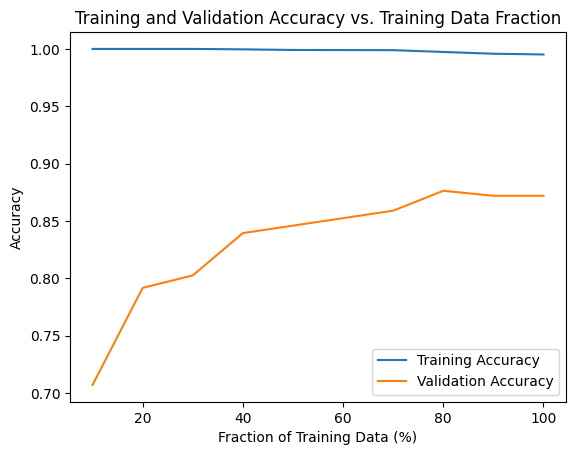

In [17]:

# Define the fractions of the training dataset to be used, ranging from 10% to 100%
data_fractions = np.linspace(0.1, 1.0, 10)



# Loop over different fractions of the training dataset
for fraction in data_fractions:
    # Select a subset of the training data
    subset_size = int(fraction * train_data.shape[0])
    X_train_subset = X_train_features[:subset_size]
    y_train_subset = y_train_labels[:subset_size]

    # Initialize the XGBoost classifier model (removed use_label_encoder)
    xgb_model = xgb.XGBClassifier(eval_metric='logloss')

    # Fit the model with the training subset
    xgb_model.fit(X_train_subset, y_train_subset)

    # Make predictions on the training data subset
    train_predictions = xgb_model.predict(X_train_subset)

    # Evaluate the model's performance using accuracy on training data
    train_accuracy = accuracy_score(y_train_subset, train_predictions)

    # Make predictions on the validation dataset
    valid_predictions = xgb_model.predict(X_valid_features)

    # Evaluate the model's performance using accuracy on validation data
    valid_accuracy = accuracy_score(y_valid_labels, valid_predictions)

    # Store the results
    training_accuracies.append(train_accuracy)
    validation_accuracies.append(valid_accuracy)

    # Print the accuracies
    print(f"Training with {fraction * 100:.1f}% of data - "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Validation Accuracy: {valid_accuracy:.4f}")

# You can plot the training and validation accuracies to see the trend
import matplotlib.pyplot as plt

plt.plot(data_fractions * 100, training_accuracies, label='Training Accuracy')
plt.plot(data_fractions * 100, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Fraction of Training Data (%)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Training Data Fraction')
plt.legend()
plt.show()


# Using Hyper parameters:

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 10.0% of data - Train Accuracy: 0.9094, Validation Accuracy: 0.7093
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 20.0% of data - Train Accuracy: 0.9502, Validation Accuracy: 0.7701
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 30.0% of data - Train Accuracy: 0.9200, Validation Accuracy: 0.7918
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 40.0% of data - Train Accuracy: 0.9117, Validation Accuracy: 0.7983
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 50.0% of data - Train Accuracy: 0.9022, Validation Accuracy: 0.8091
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 60.0% of data - Train Accuracy: 0.8677, Validation Accuracy: 0.8178
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training with 70.0% of data - Train Accuracy: 0.8892, Validation Accuracy: 0.8265

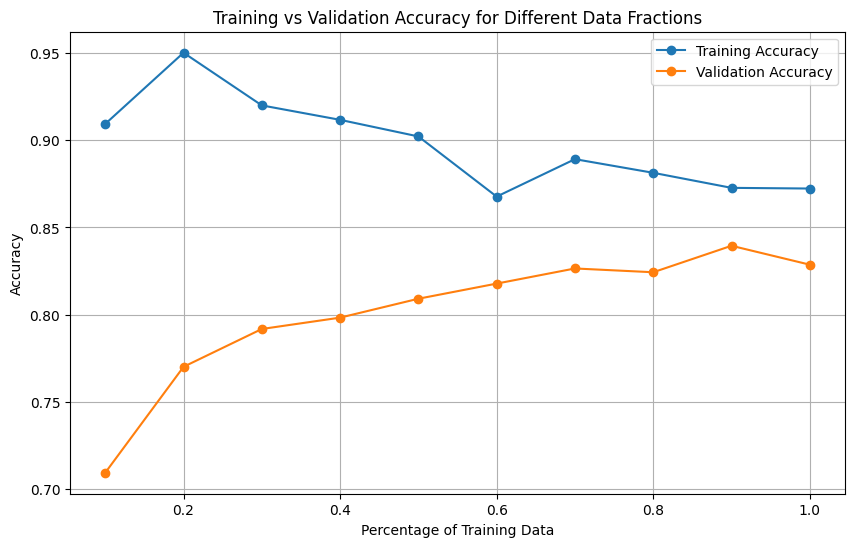

In [13]:
# Hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],  # Limit the number of estimators to reduce training time
    'max_depth': [3, 4, 5],  # Limit depth of trees to avoid overfitting and reduce time
    'learning_rate': [0.01, 0.05, 0.1],  # Lower learning rate for better generalization
    'subsample': [0.7, 0.8, 0.9],  # Use smaller subsample to speed up training
    'colsample_bytree': [0.7, 0.8, 0.9],  # Use a smaller fraction of features
    'gamma': [0, 0.1, 0.2],  # Regularization parameter to control complexity
}

# Function to train with various data fractions and print accuracy
def train_and_evaluate(X_train_features, y_train_labels, X_valid_features, y_valid_labels, datafraction2):
    # Initialize lists to store accuracy values


    for fraction in datafraction2:
        subset_size = int(fraction * X_train_features.shape[0])
        X_train_subset = X_train_features[:subset_size]
        y_train_subset = y_train_labels[:subset_size]

        # Initialize the XGBoost classifier model
        xgb_model = xgb.XGBClassifier(eval_metric='logloss')

        # Step 1: Setup RandomizedSearchCV with 3-fold cross-validation and 10 iterations
        random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3,
                                           verbose=1, n_jobs=-1, random_state=42)

        # Step 2: Fit the model with the training data subset
        random_search.fit(X_train_subset, y_train_subset)

        # Step 3: Make predictions on the validation dataset
        predictions = random_search.best_estimator_.predict(X_valid_features)

        # Step 4: Evaluate the model's performance using accuracy
        train_accuracy2 = random_search.best_estimator_.score(X_train_subset, y_train_subset)
        valid_accuracy2 = accuracy_score(y_valid_labels, predictions)

        # Append the accuracies to the lists
        train_accuracies2.append(train_accuracy2)
        valid_accuracies2.append(valid_accuracy2)

        # Print the results
        print(f"Training with {fraction * 100:.1f}% of data - "
              f"Train Accuracy: {train_accuracy2:.4f}, "
              f"Validation Accuracy: {valid_accuracy2:.4f}")

    # Ensure the lists have the same length as datafraction2
    if len(train_accuracies2) != len(datafraction2) or len(valid_accuracies2) != len(datafraction2):
        print(f"Error: Accuracies and data fractions have mismatched lengths!")
        return

    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(datafraction2, train_accuracies2, label='Training Accuracy', marker='o')
    plt.plot(datafraction2, valid_accuracies2, label='Validation Accuracy', marker='o')
    plt.xlabel("Percentage of Training Data")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy for Different Data Fractions")
    plt.legend()
    plt.grid(True)
    plt.show()

# Prepare the features and labels for training
X_train_features = pd.DataFrame(train_data['encoded_str'].tolist())
y_train_labels = train_data['label'].values

# Define the fractions of the training dataset to be used, ranging from 10% to 100%
datafraction2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Run training and evaluation for different data fractions
train_and_evaluate(X_train_features, y_train_labels, X_valid_features, y_valid_labels, datafraction2)


# Using LSTM :

# Trainable Paramters limiting:

In [8]:

# Initialize the model
model = Sequential()
model.add(Embedding(input_dim=len(char_to_integer_mapping) + 1, output_dim=32))  # Embedding layer
model.add(LSTM(32, return_sequences=False))  # LSTM layer with 32 units
model.add(Dense(16, activation='relu'))  # Dense layer with 16 units
model.add(Dense(8, activation='relu'))  # Another Dense layer with 8 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pass a small batch of data to build the model
model.build(input_shape=(None, 13))  # Shape should match the expected input, e.g., (batch_size, sequence_length)

# Now, print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 13, 32)              │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

# Proceeding with model training:

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Training with 10.0% of data - Train Accuracy: 0.8187, Validation Accuracy: 0.7028
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training with 20.0% of data - Train Accuracy: 0.8800, Validation Accuracy: 0.7310
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Training with 30.0% of data - Train Accuracy: 0.9064, Validation Accuracy: 0.7766
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Training with 40.0% of data - Train Accuracy: 0.9528, Validation Accuracy: 0.8069
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with 50.0% of data - Train Accuracy: 0.9589, Validation Accuracy: 0.8460
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with 60.0% of data - Train Accuracy: 0.9605, Validation Accuracy: 0.8134
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training with 70.0% of data - Train Accuracy: 0.9784, Validation Accuracy: 0.8395
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training with 80.0% of data - Train Accuracy: 0.9796, Validation Accuracy: 0.8503
15/15 ━━━━━━━━━━━━━━━━━━

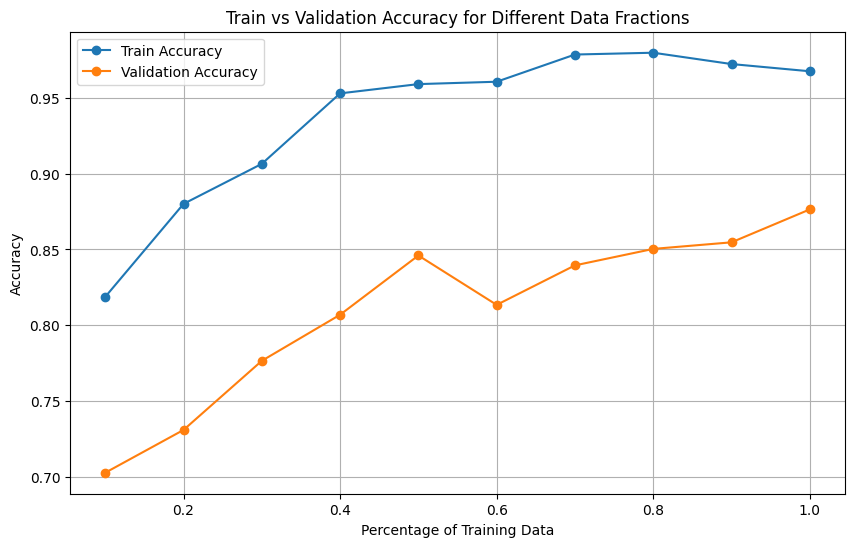

In [15]:
# Load the datasets for training and validation
train_data = pd.read_csv("/content/train_text_seq.csv")
valid_data = pd.read_csv("/content/valid_text_seq.csv")

# Substrings to remove from the strings
remove_substrings_list = ['15436', '1596', '464', '614', '262', '422', '284']

# Function to remove the specified substrings from a sequence
def filter_substrings(sequence, substrings):
    for substring in substrings:
        sequence = sequence.replace(substring, '')  # Remove each specified substring
    return sequence

# Preprocessing function for the dataset
def clean_data(df):
    # Remove leading zeros
    df['cleaned_str'] = df['input_str'].apply(lambda x: x[3:])
    # Remove specific substrings
    df['modified_str'] = df['cleaned_str'].apply(lambda x: filter_substrings(x, remove_substrings_list))
    # Add a new column for the length of the modified string
    df['modified_length'] = df['modified_str'].apply(len)
    # Filter only strings with length 13 after modification
    df = df[df['modified_length'] == 13]
    return df

# Clean both the training and validation datasets
train_data = clean_data(train_data)
valid_data = clean_data(valid_data)

# Function to encode the strings as integer values
def string_to_int_encoding(df):
    # Create a set of all unique characters from the modified strings
    unique_chars = sorted(list(set("".join(df['modified_str'].values))))
    # Create a dictionary to map each character to a unique integer
    char_to_integer = {char: idx + 1 for idx, char in enumerate(unique_chars)}
    # Encode the modified string using the character to integer mapping
    df.loc[:, 'encoded_str'] = df['modified_str'].apply(lambda x: [char_to_integer[char] for char in x])  # Fix warning by using .loc
    return df, char_to_integer

# Apply the encoding function to both the training and validation data
train_data, char_to_integer_mapping = string_to_int_encoding(train_data)
valid_data, _ = string_to_int_encoding(valid_data)

# Prepare the data for LSTM
X_train_features = pad_sequences(train_data['encoded_str'], maxlen=13, padding='post')
y_train_labels = train_data['label'].values
X_valid_features = pad_sequences(valid_data['encoded_str'], maxlen=13, padding='post')
y_valid_labels = valid_data['label'].values

# Define the data fractions for training
datafraction3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Function to train and evaluate the model with different fractions of the training data
def train_and_evaluate(X_train_features, y_train_labels, X_valid_features, y_valid_labels, data_fractions):

    for fraction in data_fractions:
        subset_size = int(fraction * X_train_features.shape[0])
        X_train_subset = X_train_features[:subset_size]
        y_train_subset = y_train_labels[:subset_size]

        # Define the LSTM model
        model = Sequential()
        model.add(Embedding(input_dim=len(char_to_integer_mapping) + 1, output_dim=32))  # Embedding layer
        model.add(LSTM(32, return_sequences=False))  # LSTM layer with 32 units
        model.add(Dense(16, activation='relu'))  # Dense layer with 16 units
        model.add(Dense(8, activation='relu'))  # Another Dense layer with 8 units
        model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model for 50 epochs
        model.fit(X_train_subset, y_train_subset, epochs=50, batch_size=32, validation_data=(X_valid_features, y_valid_labels), verbose=0)

        # Evaluate the model performance on the validation data
        predictions = model.predict(X_valid_features)
        predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary values

        # Calculate the accuracy
        train_accuracy3 = model.evaluate(X_train_subset, y_train_subset, verbose=0)[1]  # Get train accuracy
        valid_accuracy3 = accuracy_score(y_valid_labels, predictions)

        # Append the accuracies to the lists
        train_accuracies3.append(train_accuracy3)
        valid_accuracies3.append(valid_accuracy3)

        # Print the results
        print(f"Training with {fraction * 100:.1f}% of data - "
              f"Train Accuracy: {train_accuracy3:.4f}, "
              f"Validation Accuracy: {valid_accuracy3:.4f}")

    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.plot(data_fractions, train_accuracies3, label='Train Accuracy', marker='o')
    plt.plot(data_fractions, valid_accuracies3, label='Validation Accuracy', marker='o')
    plt.xlabel("Percentage of Training Data")
    plt.ylabel("Accuracy")
    plt.title("Train vs Validation Accuracy for Different Data Fractions")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run training and evaluation for different data fractions
train_and_evaluate(X_train_features, y_train_labels, X_valid_features, y_valid_labels, datafraction3)


In [20]:
# Check the lengths of the accuracy lists before plotting
print("Length of training_accuracies:",len(training_accuracies))
print("Length of validation_accuracies:", len(validation_accuracies))
print("Length of train_accuracies3:", len(train_accuracies3))
print("Length of valid_accuracies3:", len(valid_accuracies3))
print("Length of train_accuracies2:", len(train_accuracies2))
print("Length of valid_accuracies2:", len(valid_accuracies2))
print("Length of data_fractions:", len(data_fractions))


Length of training_accuracies: 10
Length of validation_accuracies: 10
Length of train_accuracies3: 10
Length of valid_accuracies3: 10
Length of train_accuracies2: 10
Length of valid_accuracies2: 10
Length of data_fractions: 10


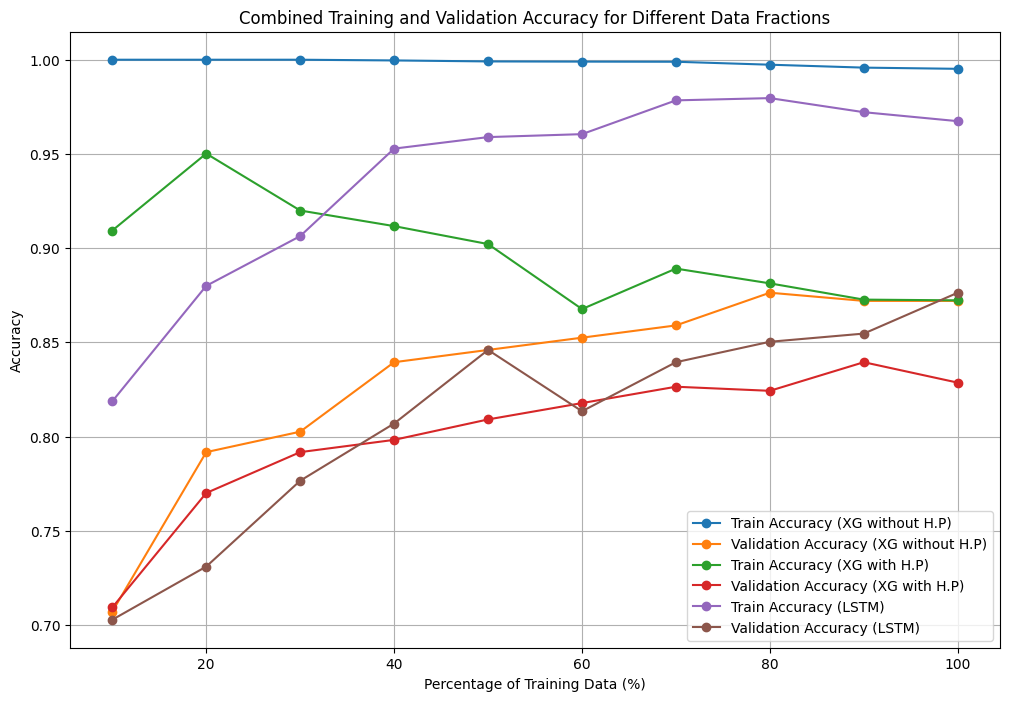

In [23]:

# Combined plot for all three functions
plt.figure(figsize=(12, 8))

# Plot for the XG_Boosting without hyperparameters function
plt.plot(data_fractions * 100, training_accuracies, label='Train Accuracy (XG without H.P)', marker='o')
plt.plot(data_fractions * 100, validation_accuracies, label='Validation Accuracy (XG without H.P)', marker='o')

# Plot for the XG_Boosting with hyperparameters function
plt.plot(data_fractions * 100, train_accuracies2, label='Train Accuracy (XG with H.P)', marker='o')
plt.plot(data_fractions * 100, valid_accuracies2, label='Validation Accuracy (XG with H.P)', marker='o')

# Plot for the LSTM function
plt.plot(data_fractions * 100, train_accuracies3, label='Train Accuracy (LSTM)', marker='o')
plt.plot(data_fractions * 100, valid_accuracies3, label='Validation Accuracy (LSTM)', marker='o')

# Labels and title
plt.xlabel('Percentage of Training Data (%)')
plt.ylabel('Accuracy')
plt.title('Combined Training and Validation Accuracy for Different Data Fractions')

# Show the legend
plt.legend()

# Display the grid for better readability
plt.grid(True)

# Show the plot
plt.show()


# Model giving best results among tested ones -: XgBoosting (Without Hyperparameters)

###### Inference:
###### Xgboosting with hyperparameter doesn't perform better than without H.parameter since it causes model to undergo overfitting thus reduce performance on testing.